<span style="font-size: 14pt">EREVAN, May-June 2017</span>

<span style="font-size: 16pt"> HW #4: ARIMA model

<span style="color:blue; font-size: 12pt">Alexey Romanenko </span>,
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'">alexromsput@gmail.com</span>


<h1 align="center"> Home Work 4 </h1>

Realize Box-Cox transformation

As you've seen in seminar 5 boxcox transformation from scipy does not work well.
It's suggested to realize method for searching optimal $\lambda$ for boxcox transformation.
Approach for finding the optimal $\lambda$ is descibed <a href="https://www.researchgate.net/profile/Victor_Guerrero6/publication/229710167_Time_series_analysis_supported_by_power_transformation/links/0c960523d0a65d8a32000000/Time-series-analysis-supported-by-power-transformation.pdf">here</a>.  

You need to replace all 'TODO' below by some code:

In [1]:
import numpy as np
class boxcox():
    def __init__(self, lmbda=None, shift=0):
        '''
    Box Cox Transforms
    Transforms data are to be normal. Also known as power transform.
    
    Parameters
        ----------
    lmbda: float or None
        lmbda the power parameter. The None input automatically calculates
        lmbda based on method guerrero
    shift: float
        Use to normalize data by shifting data to all positive values
        
        '''
        self.lmbda = lmbda
        self.shift = shift
        self.y = []
        self.method = 'guerrero'
        
    def transform(self, x, n=2):
        '''
            x: time series
            n: number of subseries with constant dispersion
        '''
        x = 1.0*np.asarray(x)
        
        if self.shift>0:
            x += self.shift # DONE: shift time series up
            
        if self.lmbda is None:
            self.lmbda = self.optimal_lambda(x, n) # DONE
            
        if self.lmbda == 0:
            self.y = np.log(x) # DONE
        else:
            self.y = (x**self.lmbda - 1)/self.lmbda # DONE
        return self.y, self.lmbda
        
    def optimal_lambda(self,x, n=2):
        """
        Parameters
        ----------
        x - time series with different variance through the time
        n - number of subseries in x, each subseries x_i has constant variance sigma_i and constant mean m_i
        The method states, that optimal lambda should be chosen in such a way that
         
         sigma_i/(m_i)**(1-lambda) = constant, for all i=1,...,n
        
        you need to find solution for the follow Regression problem:
        
        log(sigma_i) = w_1 + w_2*log(m_i), where
        w_2 = 1-lambda
        
        """
        x = 1.0*np.asarray(x)
        x_parts = np.array_split(x, n)
               
        sigma = np.ones(n) # DONE: initialize array for log(sigma_i)
        m = np.ones(2 * n).reshape(2,n) # DONE: initialize array for matrix of regression [1, log(m_i)]

        r = len(x)/n # the length of each subseries

        for i in range(n):
            m[1][i] = np.log(np.mean(x_parts[i])) # DONE: fill matrix of regression
            sigma[i] = np.log(np.var(x_parts[i]))/2 # DONE: fill array of sigma
            
        # find the solution for regression Xw=y, where X = m, w[1] = 1-lambda, 
        w = np.dot(np.linalg.inv(np.dot(m,m.T)),np.dot(m,sigma))[1]
        self.lmbda = 1-w # DONE: set value of lambda
        
        return self.lmbda

    def inverse(self, y=None):
        """
        Parameters
        ----------
        y: time series

        Returns
        -------
        x: inverse transformed ts
    
        """
        if y is None:
            y = self.y
        
        if self.lmbda == 0:
            x = np.exp(y) # DONE
        else:
            x = (self.lmbda*y + 1)**(1/self.lmbda) # DONE
        return x

## Check your solution on wage data

In [2]:
# boxcox for wage dataset 
import pandas as pd
%matplotlib inline
ts_wage = pd.read_csv('./data/monthly-wage.csv', sep=';', decimal='.', parse_dates=True, index_col='Month')

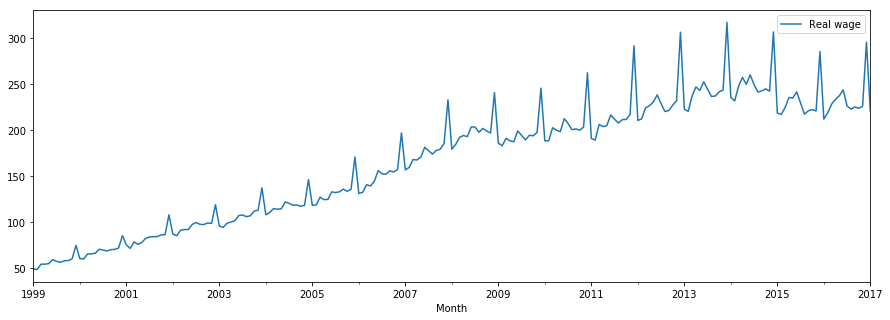

In [3]:
# cut first steps
ts_wage = ts_wage.loc['01.01.1999':'01.01.2017']
ts_wage.plot(figsize=(15,5))

lambda= 0.0532178007927


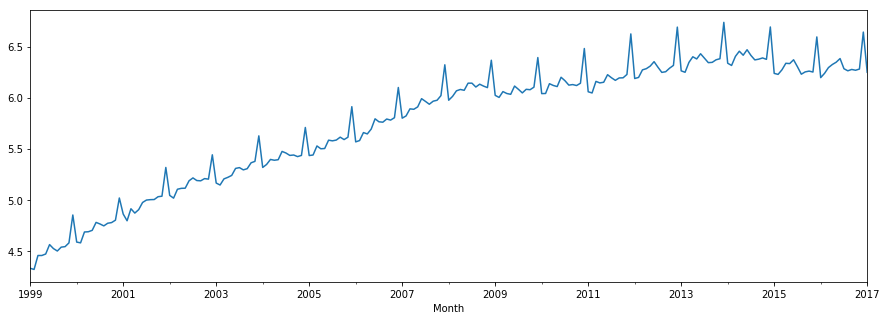

In [4]:
bc = boxcox()
ts_wage['wage_boxcox'], lmbda = bc.transform(ts_wage['Real wage'],n=18)
print('lambda=', lmbda)
ts_wage['wage_boxcox'].plot(figsize=(15,5))

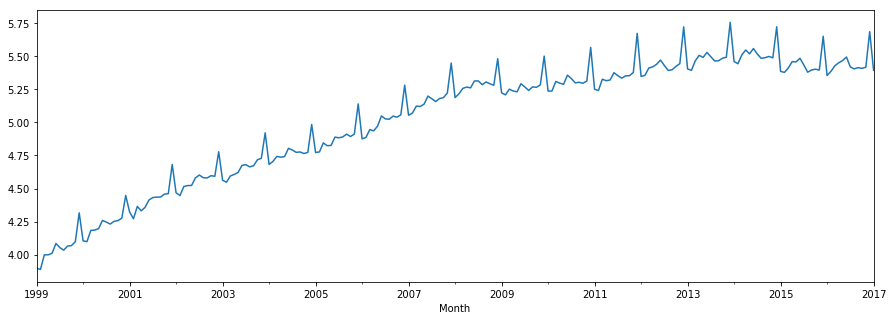

In [5]:
# now it's clear that optimal lambda is close to 0
bc = boxcox(lmbda=0)
ts_wage['wage_boxcox'] = bc.transform(ts_wage['Real wage'])[0]
ts_wage['wage_boxcox'].plot(figsize=(15,5))